In [64]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from fit_emission import cube_fit_Halpha
from display import plot_example_spectra, plot_rgb_image, plot_velocity_map

### Load and Extract Data

In [65]:
file = 'manga-12510-12701-LOGCUBE.fits'
cube = fits.open(file)

flux = cube['FLUX'].data
wave = cube['WAVE'].data

### Image of Galaxy

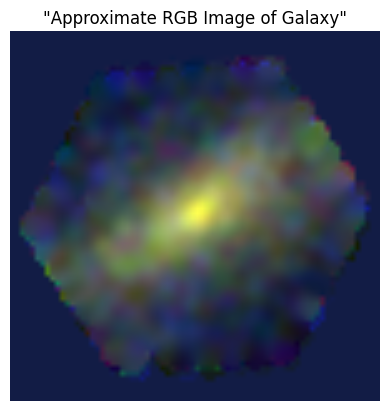

In [66]:
plot_rgb_image(flux, wave, b_scale=0.6)

### Plot Example Spectrum

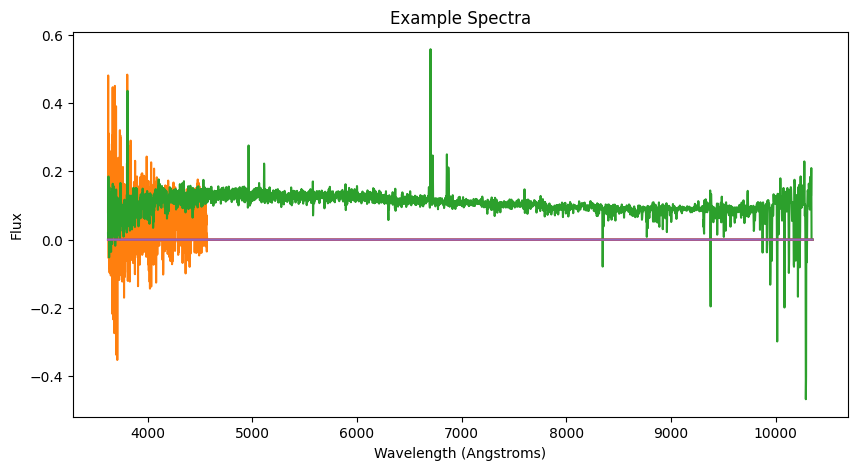

In [67]:
plot_example_spectra(flux, wave, n=5)

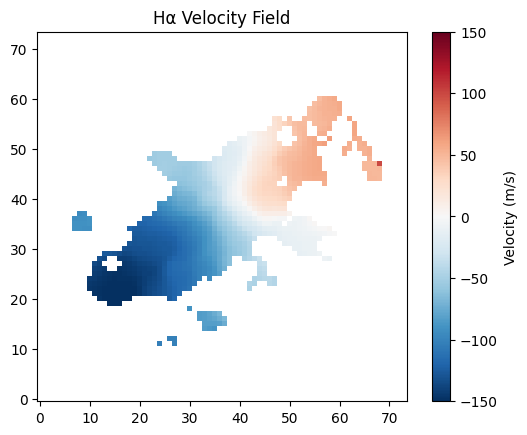

In [68]:
vel_map, flux_map, wave_map, popt_map = cube_fit_Halpha(flux, wave, threshold=0.1, window_centre=6705, ws=15, std=0.5)

plt.imshow(vel_map, origin='lower', cmap='RdBu_r', vmin=-150, vmax=150)
plt.colorbar(label="Velocity (m/s)")
plt.title("Hα Velocity Field")
plt.show()

In [69]:
file = 'manga-12491-12704-LOGCUBE.fits'
cube = fits.open(file)

flux = cube['FLUX'].data
wave = cube['WAVE'].data

### Image of Galaxy

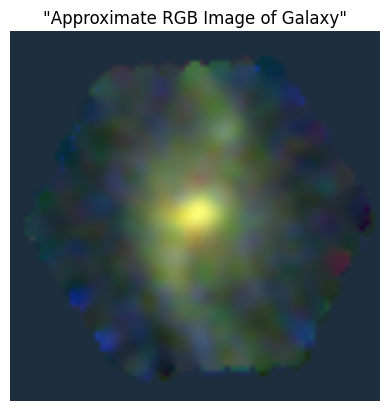

In [70]:
plot_rgb_image(flux, wave, b_scale=0.6)

### Plot Example Spectrum

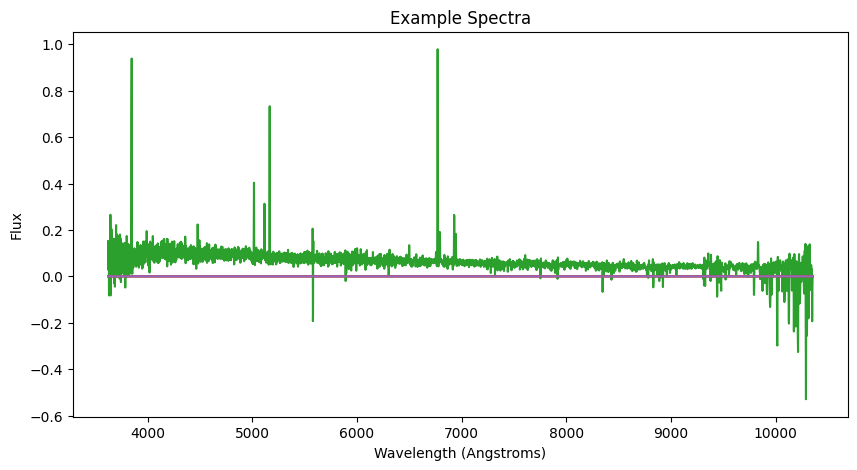

In [71]:
plot_example_spectra(flux, wave, n=5)

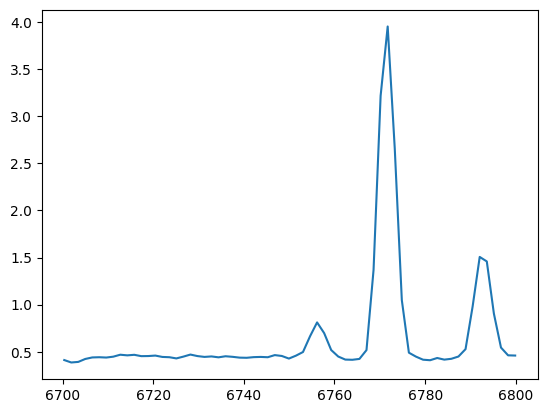

In [72]:
x = 37
y = 37
mask = (wave > 6700) & (wave < 6800)
plt.plot(wave[mask], flux[mask, y, x], label='Spectrum at (37, 37)')


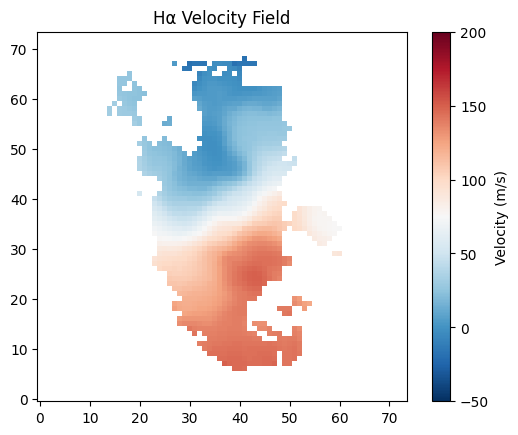

In [77]:
vel_map, flux_map, wave_map, popt_map = cube_fit_Halpha(flux, wave, window_centre=6770, threshold=0.01, ws=40, std=1)

plt.imshow(vel_map, origin='lower', cmap='RdBu_r', vmin=-50, vmax=200)
plt.colorbar(label="Velocity (m/s)")
plt.title("Hα Velocity Field")
plt.show()